# Imports

In [ ]:
!pip install feature_engine

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from scipy.stats import gaussian_kde
from sklearn.linear_model import  LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
df = pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


**Basic information about data**


*   Loan_ID: A unique identifier assigned to each loan application.

*   Gender: Gender of the loan applicant (e.g., Male, Female).

*   Married: Marital status of the loan applicant (e.g., Yes, No)

*   Dependents: Number of dependents (e.g., children, elderly parents) the loan applicant has.

*   Education: Educational qualification of the loan applicant (e.g., Graduate, Not Graduate).
*   Self_Employed: Indicates whether the loan applicant is self-employed (e.g., Yes, No).


*   ApplicantIncome: Income of the primary loan applicant.


*   CoapplicantIncome: Income of the co-applicant (if any) supporting the loan application.


*   LoanAmount: The amount of loan applied for (in monetary units).


*   Loan_Amount_Term: The term or duration of the loan (in months, for example).


*   Credit_History: Credit history of the loan applicant (e.g., 1 for good credit history, 0 for poor credit history).
*   Property_Area: Area where the property for which the loan is applied is located (e.g., Urban, Semiurban, Rural)

*   Loan_Status: The status of the loan application (e.g., Approved, Denied).

# preprocessing

##Start

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
df.drop(columns = ['Loan_ID'],inplace = True)

In [ ]:
LE = LabelEncoder()
df['Loan_Status'] = LE.fit_transform(df['Loan_Status'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(labels=["Loan_Status"], axis=1),
  df["Loan_Status"],
  test_size=0.2,
  random_state=0
)

##imput

In [ ]:
X_train.shape

(304, 11)

In [ ]:
#NaN percentage
(X_train.isna().sum()/304) * 100

Gender               0.986842
Married              0.000000
Dependents           2.302632
Education            0.000000
Self_Employed        4.934211
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     3.618421
Credit_History       8.223684
Property_Area        0.000000
dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
categorical_vars = X_train.select_dtypes(include="O").columns.to_list()

numeric_vars =X_train.select_dtypes(exclude="O").columns.to_list()

numeric_vars

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
ct = ColumnTransformer(
[("imputer",imputer, categorical_vars)],
remainder="passthrough"
)

In [ ]:
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
X_train = pd.DataFrame(
X_train,
columns=categorical_vars + numeric_vars
)
X_test = pd.DataFrame(
X_test,
columns=categorical_vars + numeric_vars
)

In [ ]:
(X_train.isna().sum()/304) * 100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
Property_Area        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     3.618421
Credit_History       8.223684
dtype: float64

In [ ]:
KNI = KNNImputer()
KNI.fit(X_train[numeric_vars])
X_train[numeric_vars] = KNI.transform(X_train[numeric_vars])
X_test[numeric_vars] = KNI.transform(X_test[numeric_vars])

In [ ]:
(X_train.isna().sum()/304) * 100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
Property_Area        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
dtype: float64

##EDA

In [ ]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,3561.878289,1339.355658,105.381579,340.144737,0.836184
std,1344.170178,2535.833151,28.308516,67.195239,0.362071
min,645.000000,0.000000,9.000000,12.000000,0.000000
25%,2615.000000,0.000000,92.250000,360.000000,1.000000
50%,3321.000000,1036.000000,110.500000,360.000000,1.000000
75%,4281.500000,2034.250000,127.250000,360.000000,1.000000
max,9323.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
X_train['ApplicantIncome'].quantile(0.95)

6049.25

In [ ]:
X_train['CoapplicantIncome'].quantile(0.4)

0.0



*   25% of Applicants have more than 4000 dollars incom
*   40% of Applicants don't have Coapplicant

*   maximum loan amount is 150000 dollars





Gender
Married


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Dependents
Education
Self_Employed


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Property_Area


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


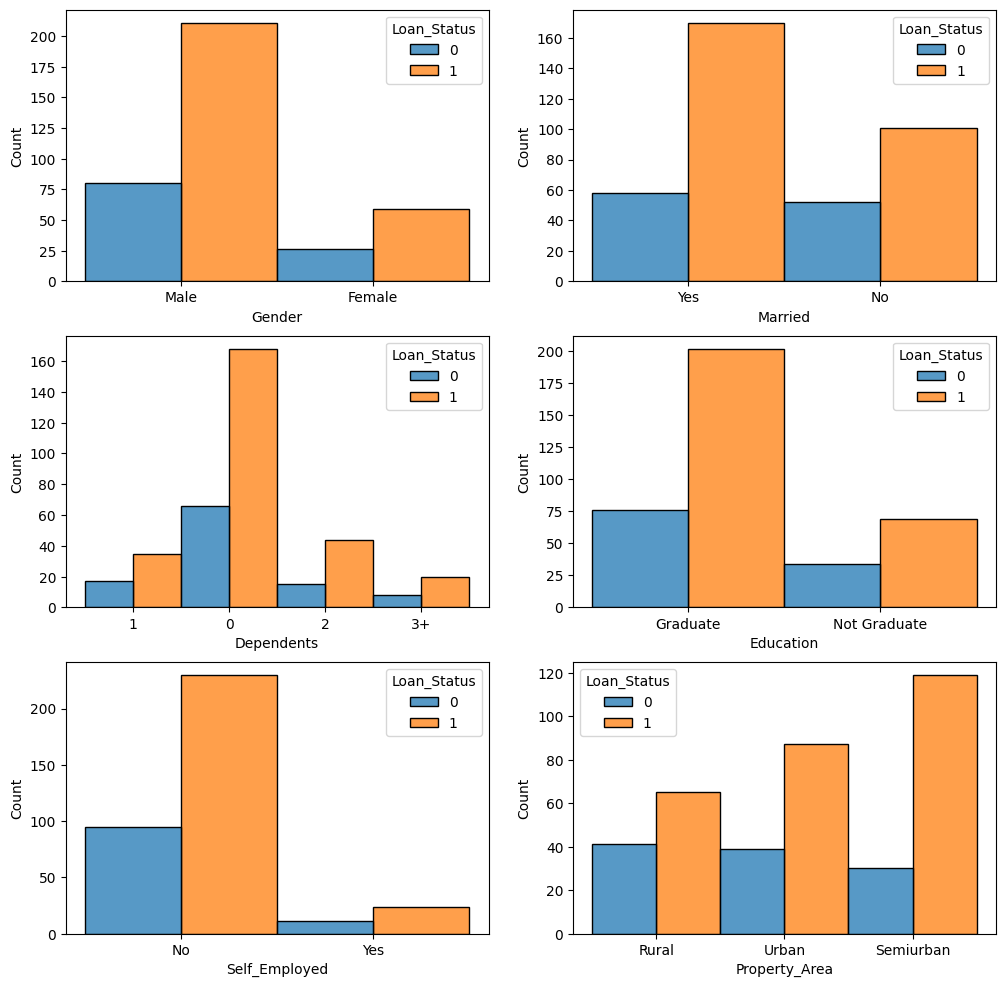

In [ ]:
k=1
plt.figure(figsize=(12,12))
for i in categorical_vars:
   print(i)
   plt.subplot(3,2,k)
   sns.histplot(x=i,data = df,hue = 'Loan_Status',stat="count",multiple="dodge")
   k+=1



*   married people requests are approved more than non married people(consideable different)
*   semiurban people requests are approved much more than Rural people in percentage and also considerably more than urban people.

**other features haven't got considerable different in percentage.**



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Gender', ylabel='Count'>

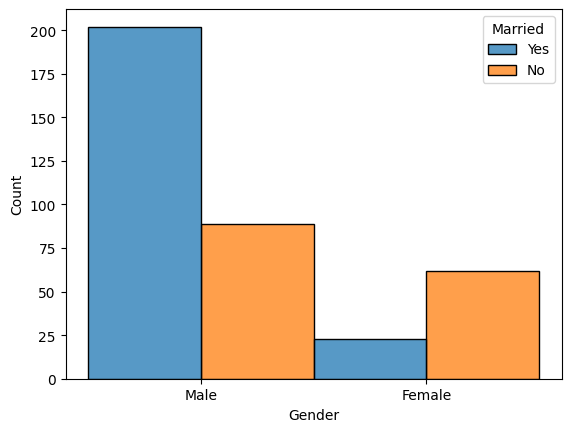

In [ ]:
sns.histplot(x = 'Gender',data = df,hue = 'Married',stat="count",multiple="dodge")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Gender', ylabel='Count'>

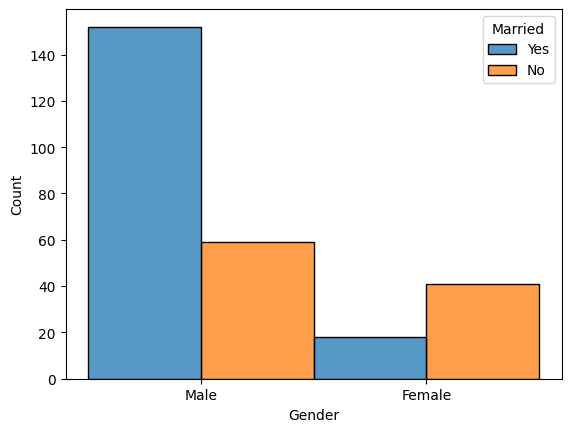

In [ ]:
sns.histplot(x = 'Gender',data = df[df['Loan_Status'] == 1],hue = 'Married',stat="count",multiple="dodge")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Gender', ylabel='Count'>

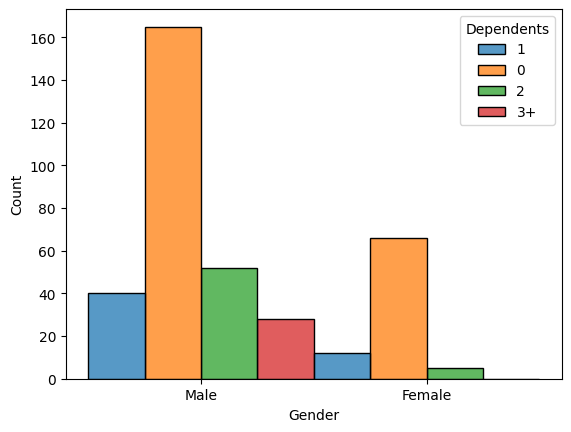

In [ ]:
sns.histplot(x = 'Gender',data = df,hue = 'Dependents',stat="count",multiple="dodge")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Gender', ylabel='Count'>

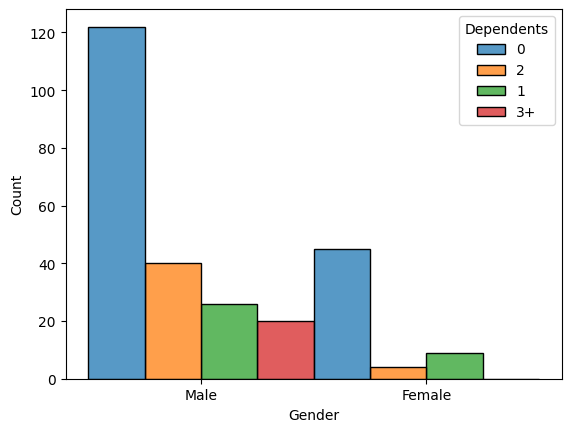

In [ ]:
sns.histplot(x = 'Gender',data = df[df['Loan_Status'] == 1],hue = 'Dependents',stat="count",multiple="dodge")

##outliers

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(5,1,1)
sns.boxplot(x='ApplicantIncome',data=X_train)
plt.subplot(5,1,2)
sns.boxplot(x='CoapplicantIncome',data=X_train)
plt.subplot(5,1,3)
sns.boxplot(x='LoanAmount',data=X_train)
plt.subplot(5,1,4)
sns.boxplot(x='Loan_Amount_Term',data=X_train)
plt.subplot(5,1,5)
sns.boxplot(x='Credit_History',data=X_train)

NameError: name 'X_train' is not defined

In [ ]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
#for i in numeric_vars:
  #IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
  #y_train.drop(X_train[(X_train[i].values< (X_train[i].quantile(0.25)-2.5*IQR)) | (X_train[i].values> (X_train[i].quantile(0.75)+2.5*IQR))].index,inplace = True)
  #y_test.drop(X_test[(X_test[i].values<(X_train[i].quantile(0.25)-2.5*IQR)) | (X_test[i].values>(X_train[i].quantile(0.75)+2.5*IQR))].index,inplace = True)
  #X_test.drop(X_test[(X_test[i].values<(X_train[i].quantile(0.25)-2.5*IQR)) | (X_test[i].values>(X_train[i].quantile(0.75)+2.5*IQR))].index,inplace = True)
  #X_train.drop(X_train[(X_train[i].values<(X_train[i].quantile(0.25)-2.5*IQR)) | (X_train[i].values>(X_train[i].quantile(0.75)+2.5*IQR))].index,inplace = True)

In [ ]:
X_train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    254
180.0     25
480.0      8
300.0      6
84.0       3
60.0       1
12.0       1
216.0      1
324.0      1
312.0      1
240.0      1
120.0      1
288.0      1
Name: count, dtype: int64

In [ ]:
X_train.drop(columns=['Loan_Amount_Term'],inplace = True)
X_test.drop(columns=['Loan_Amount_Term'],inplace = True)
numeric_vars.remove('Loan_Amount_Term')

In [ ]:
X_test.shape

(77, 10)




*   removing outliers will caus a loss of considreable amount of data. so I just deal with them differently in next parts





##interactions

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
def Intraction(f1:str,f2:str):
   sns.lmplot(x=f1,y='Loan_Status',hue=f2,data=df.iloc[X_train.index],logistic = True)

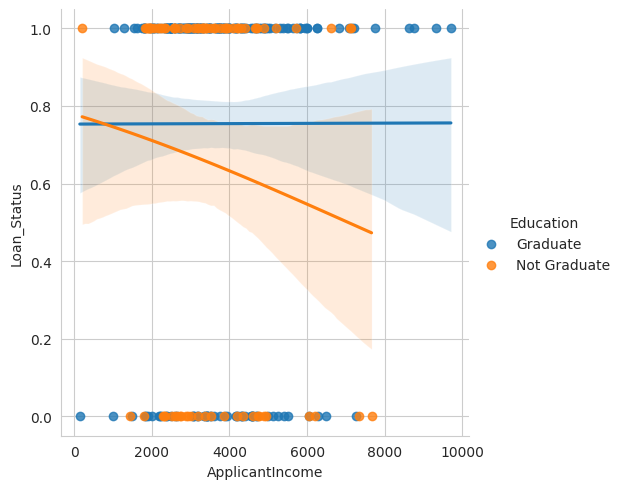

In [ ]:
Intraction('ApplicantIncome','Education')

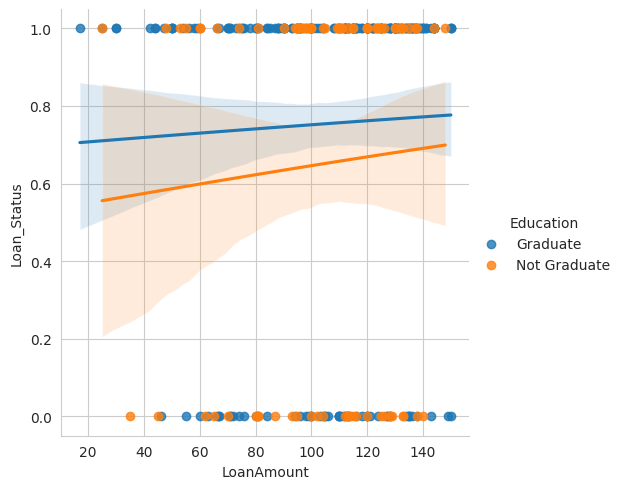

In [ ]:
Intraction('LoanAmount','Education')

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


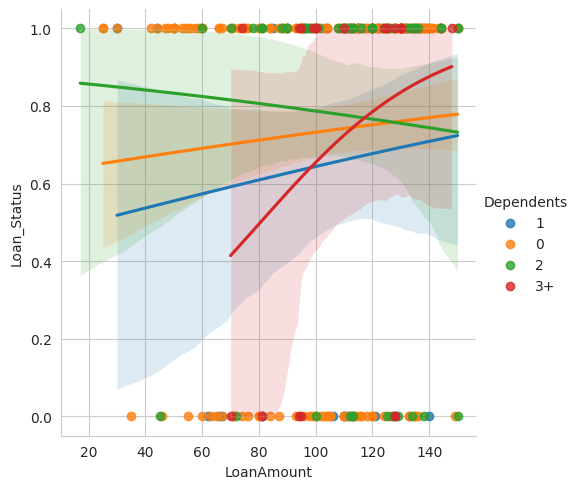

In [ ]:
Intraction('LoanAmount','Dependents')

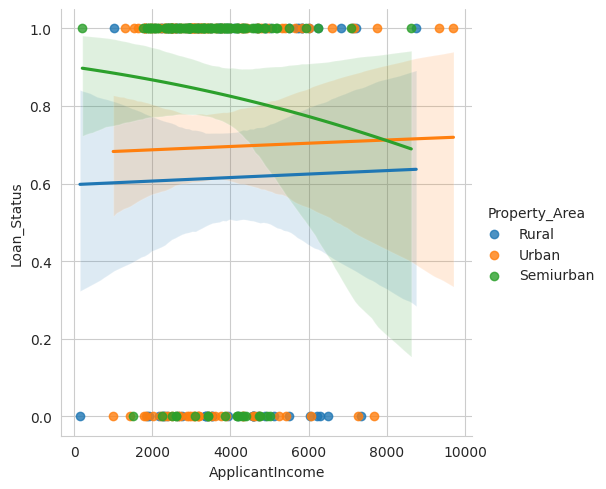

In [ ]:
Intraction('ApplicantIncome','Property_Area')

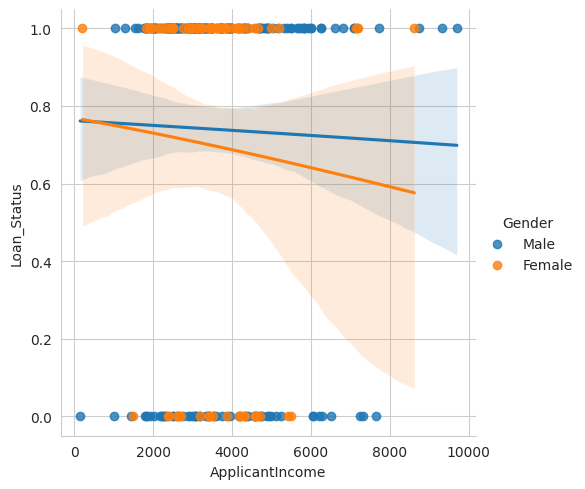

In [ ]:
Intraction('ApplicantIncome','Gender')

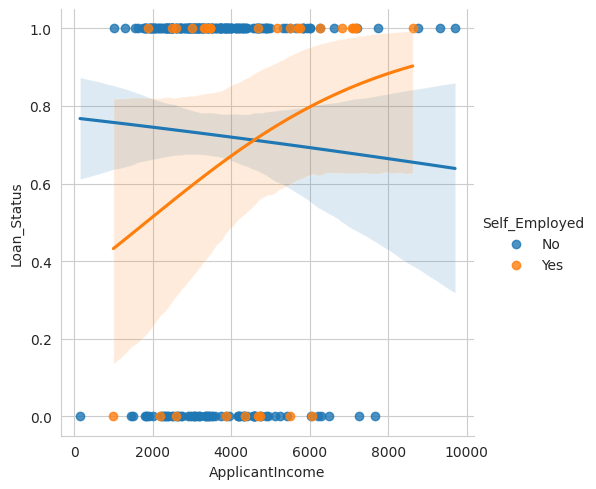

In [ ]:
Intraction('ApplicantIncome','Self_Employed')

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


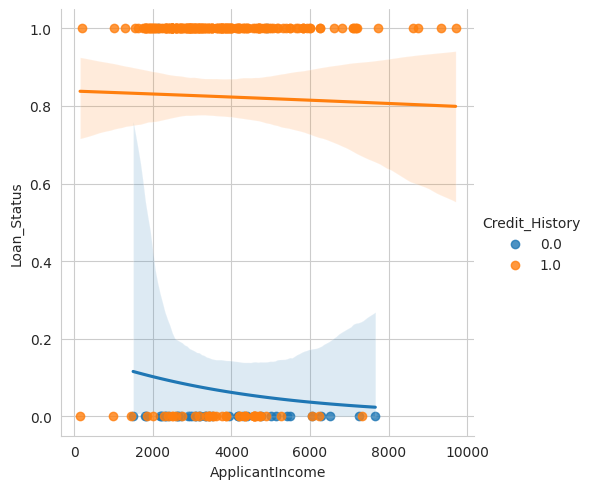

In [ ]:
Intraction('ApplicantIncome','Credit_History')

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)

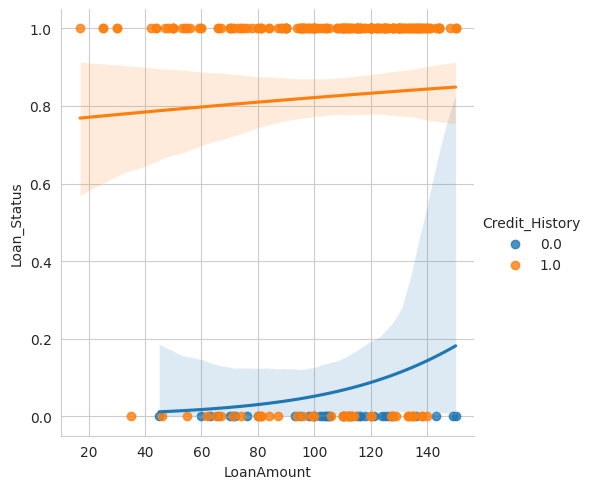

In [ ]:
Intraction('LoanAmount','Credit_History')

**I recognized 3 interactions**


*   *ApplicantIncome*  with  *Education*
*   *LoanAmount* with *Dependents*
*   *ApplicantIncome* with *Self_Employed*

In [ ]:
def Make_interact(Xt,f1 : str,f2 : str):
  dummies = pd.get_dummies(Xt[f2])
  dummies = dummies.astype('float')
  for i in dummies.columns:
     Xt[f"{f1}_{i}"] = Xt[f1] * dummies[i]

In [ ]:
Make_interact(X_train,'ApplicantIncome','Education')
Make_interact(X_train,'LoanAmount','Dependents')
Make_interact(X_train,'ApplicantIncome','Self_Employed')
Make_interact(X_train,'ApplicantIncome','Credit_History')
Make_interact(X_train,'LoanAmount','Credit_History')

In [ ]:
Make_interact(X_test,'ApplicantIncome','Education')
Make_interact(X_test,'LoanAmount','Dependents')
Make_interact(X_test,'ApplicantIncome','Self_Employed')
Make_interact(X_test,'ApplicantIncome','Credit_History')
Make_interact(X_test,'LoanAmount','Credit_History')

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,...,ApplicantIncome_No,ApplicantIncome_Yes,ApplicantIncome_0.0,ApplicantIncome_0.6,ApplicantIncome_0.8,ApplicantIncome_1.0,LoanAmount_0.0,LoanAmount_0.6,LoanAmount_0.8,LoanAmount_1.0
0,Male,Yes,0,Not Graduate,No,Semiurban,2875.0,1750.0,105.0,1.0,...,2875.0,0.0,0.0,0.0,0.0,2875.0,0.0,0.0,0.0,105.0
1,Male,Yes,3+,Not Graduate,No,Rural,3095.0,0.0,113.0,1.0,...,3095.0,0.0,0.0,0.0,0.0,3095.0,0.0,0.0,0.0,113.0
2,Male,No,0,Graduate,No,Urban,3069.0,0.0,71.0,1.0,...,3069.0,0.0,0.0,0.0,0.0,3069.0,0.0,0.0,0.0,71.0
3,Male,Yes,3+,Graduate,Yes,Rural,5677.0,1424.0,100.0,1.0,...,0.0,5677.0,0.0,0.0,0.0,5677.0,0.0,0.0,0.0,100.0
4,Female,Yes,2,Graduate,No,Semiurban,4283.0,2383.0,127.0,1.0,...,4283.0,0.0,0.0,0.0,0.0,4283.0,0.0,0.0,0.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Male,Yes,2,Graduate,No,Urban,3283.0,2035.0,148.0,1.0,...,3283.0,0.0,0.0,0.0,0.0,3283.0,0.0,0.0,0.0,148.0
300,Male,Yes,1,Graduate,No,Urban,1625.0,1803.0,96.0,1.0,...,1625.0,0.0,0.0,0.0,0.0,1625.0,0.0,0.0,0.0,96.0
301,Male,No,0,Graduate,No,Rural,4191.0,0.0,120.0,1.0,...,4191.0,0.0,0.0,0.0,0.0,4191.0,0.0,0.0,0.0,120.0
302,Female,No,0,Graduate,No,Semiurban,4166.0,0.0,116.0,0.0,...,4166.0,0.0,4166.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0


In [ ]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,...,ApplicantIncome_No,ApplicantIncome_Yes,ApplicantIncome_0.0,ApplicantIncome_0.6,ApplicantIncome_0.8,ApplicantIncome_1.0,LoanAmount_0.0,LoanAmount_0.6,LoanAmount_0.8,LoanAmount_1.0
0,Female,No,1,Graduate,No,Rural,3812.0,0.0,112.0,1.0,...,3812.0,0.0,0.0,0.0,0.0,3812.0,0.0,0.0,0.0,112.0
1,Male,No,2,Graduate,No,Rural,3547.0,0.0,80.0,0.0,...,3547.0,0.0,3547.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0
2,Male,No,0,Graduate,No,Semiurban,4750.0,0.0,94.0,1.0,...,4750.0,0.0,0.0,0.0,0.0,4750.0,0.0,0.0,0.0,94.0
3,Male,Yes,2,Graduate,No,Semiurban,5935.0,0.0,133.0,1.0,...,5935.0,0.0,0.0,0.0,0.0,5935.0,0.0,0.0,0.0,133.0
4,Female,No,0,Graduate,No,Rural,2378.0,0.0,46.0,1.0,...,2378.0,0.0,0.0,0.0,0.0,2378.0,0.0,0.0,0.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Male,Yes,0,Graduate,No,Semiurban,4310.0,0.0,130.0,0.8,...,4310.0,0.0,0.0,0.0,4310.0,0.0,0.0,0.0,130.0,0.0
73,Male,Yes,2,Graduate,No,Urban,5391.0,0.0,130.0,1.0,...,5391.0,0.0,0.0,0.0,0.0,5391.0,0.0,0.0,0.0,130.0
74,Male,Yes,0,Graduate,No,Rural,2483.0,2466.0,90.0,0.0,...,2483.0,0.0,2483.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0
75,Male,Yes,3+,Not Graduate,Yes,Semiurban,3333.0,2166.0,130.0,0.6,...,0.0,3333.0,0.0,3333.0,0.0,0.0,0.0,130.0,0.0,0.0


##Encoding

In [ ]:
X_train['Dependents'] = X_train['Dependents'].apply(lambda x : x.replace('+','') if '+' in x else x)
X_test['Dependents'] = X_test['Dependents'].apply(lambda x : x.replace('+','') if '+' in x else x)
X_train['Dependents'] = X_train['Dependents'].astype('int')
X_test['Dependents'] = X_test['Dependents'].astype('int')

In [ ]:
X_train.dtypes

Gender                           object
Married                          object
Dependents                        int64
Education                        object
Self_Employed                    object
Property_Area                    object
ApplicantIncome                 float64
CoapplicantIncome               float64
LoanAmount                      float64
Credit_History                  float64
ApplicantIncome_Graduate        float64
ApplicantIncome_Not Graduate    float64
LoanAmount_0                    float64
LoanAmount_1                    float64
LoanAmount_2                    float64
LoanAmount_3+                   float64
ApplicantIncome_No              float64
ApplicantIncome_Yes             float64
ApplicantIncome_0.0             float64
ApplicantIncome_0.6             float64
ApplicantIncome_0.8             float64
ApplicantIncome_1.0             float64
LoanAmount_0.0                  float64
LoanAmount_0.6                  float64
LoanAmount_0.8                  float64


In [ ]:
def BIencod(f1 : str):
  EN = OrdinalEncoder()
  EN.fit(np.array(X_train[f1]).reshape(-1, 1))
  X_train[f1] = EN.transform(np.array(X_train[f1]).reshape(-1, 1))
  X_test[f1] = EN.transform(np.array(X_test[f1]).reshape(-1, 1))

In [ ]:
BIencod('Gender')
BIencod('Married')
BIencod('Education')
BIencod('Self_Employed')

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
EN = OneHotEncoder()
EN.fit(X_train)
X_train= EN.transform(X_train)
X_test = EN.transform(X_test)

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,ApplicantIncome_Graduate,...,ApplicantIncome_0.6,ApplicantIncome_0.8,ApplicantIncome_1.0,LoanAmount_0.0,LoanAmount_0.6,LoanAmount_0.8,LoanAmount_1.0,Property_Area_Semiurban,Property_Area_Rural,Property_Area_Urban
0,1.0,1.0,0,1.0,0.0,2875.0,1750.0,105.0,1.0,0.0,...,0.0,0.0,2875.0,0.0,0.0,0.0,105.0,1,0,0
1,1.0,1.0,3,1.0,0.0,3095.0,0.0,113.0,1.0,0.0,...,0.0,0.0,3095.0,0.0,0.0,0.0,113.0,0,1,0
2,1.0,0.0,0,0.0,0.0,3069.0,0.0,71.0,1.0,3069.0,...,0.0,0.0,3069.0,0.0,0.0,0.0,71.0,0,0,1
3,1.0,1.0,3,0.0,1.0,5677.0,1424.0,100.0,1.0,5677.0,...,0.0,0.0,5677.0,0.0,0.0,0.0,100.0,0,1,0
4,0.0,1.0,2,0.0,0.0,4283.0,2383.0,127.0,1.0,4283.0,...,0.0,0.0,4283.0,0.0,0.0,0.0,127.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,1.0,2,0.0,0.0,3283.0,2035.0,148.0,1.0,3283.0,...,0.0,0.0,3283.0,0.0,0.0,0.0,148.0,0,0,1
300,1.0,1.0,1,0.0,0.0,1625.0,1803.0,96.0,1.0,1625.0,...,0.0,0.0,1625.0,0.0,0.0,0.0,96.0,0,0,1
301,1.0,0.0,0,0.0,0.0,4191.0,0.0,120.0,1.0,4191.0,...,0.0,0.0,4191.0,0.0,0.0,0.0,120.0,0,1,0
302,0.0,0.0,0,0.0,0.0,4166.0,0.0,116.0,0.0,4166.0,...,0.0,0.0,0.0,116.0,0.0,0.0,0.0,1,0,0


# feature engineering

## creating features(regular information)

In [ ]:
X_train['TotalIncome'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
X_test['TotalIncome'] = X_test['ApplicantIncome'] + X_test['CoapplicantIncome']

In [ ]:
X_train['RLA'] = X_train['LoanAmount'] / X_train['ApplicantIncome']
X_test['RLA'] = X_test['LoanAmount'] / X_test['ApplicantIncome']

##Discretizing

In [ ]:
X_train['Have_Coapplicant'] = X_train['CoapplicantIncome'].gt(0).astype('int')
X_test['Have_Coapplicant'] = X_test['CoapplicantIncome'].gt(0).astype('int')

In [ ]:
rang = [-np.inf,2500,4500,100000]
label = [0,1,2]
X_train['rich_or_poor']=pd.cut(X_train['ApplicantIncome'],bins=rang,labels=label).astype('int')
X_test['rich_or_poor']=pd.cut(X_test['ApplicantIncome'],bins=rang,labels=label).astype('int')

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,ApplicantIncome_Graduate,...,LoanAmount_0.6,LoanAmount_0.8,LoanAmount_1.0,Property_Area_Semiurban,Property_Area_Rural,Property_Area_Urban,TotalIncome,RLA,Have_Coapplicant,rich_or_poor
0,1.0,1.0,0,1.0,0.0,2875.0,1750.0,105.0,1.0,0.0,...,0.0,0.0,105.0,1,0,0,4625.0,0.036522,1,1
1,1.0,1.0,3,1.0,0.0,3095.0,0.0,113.0,1.0,0.0,...,0.0,0.0,113.0,0,1,0,3095.0,0.036511,0,1
2,1.0,0.0,0,0.0,0.0,3069.0,0.0,71.0,1.0,3069.0,...,0.0,0.0,71.0,0,0,1,3069.0,0.023135,0,1
3,1.0,1.0,3,0.0,1.0,5677.0,1424.0,100.0,1.0,5677.0,...,0.0,0.0,100.0,0,1,0,7101.0,0.017615,1,2
4,0.0,1.0,2,0.0,0.0,4283.0,2383.0,127.0,1.0,4283.0,...,0.0,0.0,127.0,1,0,0,6666.0,0.029652,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1.0,1.0,2,0.0,0.0,3283.0,2035.0,148.0,1.0,3283.0,...,0.0,0.0,148.0,0,0,1,5318.0,0.045081,1,1
300,1.0,1.0,1,0.0,0.0,1625.0,1803.0,96.0,1.0,1625.0,...,0.0,0.0,96.0,0,0,1,3428.0,0.059077,1,0
301,1.0,0.0,0,0.0,0.0,4191.0,0.0,120.0,1.0,4191.0,...,0.0,0.0,120.0,0,1,0,4191.0,0.028633,0,1
302,0.0,0.0,0,0.0,0.0,4166.0,0.0,116.0,0.0,4166.0,...,0.0,0.0,0.0,1,0,0,4166.0,0.027844,0,1


## Transforming features



<ipython-input-61-6fd4405c5add>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=ax,bins=20)


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'ApplicantIncome_Graduate'}>,
        <Axes: title={'center': 'ApplicantIncome_Not Graduate'}>,
        <Axes: title={'center': 'LoanAmount_0'}>],
       [<Axes: title={'center': 'LoanAmount_1'}>,
        <Axes: title={'center': 'LoanAmount_2'}>,
        <Axes: title={'center': 'LoanAmount_3+'}>,
        <Axes: title={'center': 'ApplicantIncome_No'}>,
        <Axes: title={'center': 'ApplicantIncome_Yes'}>,
        <Axes: title={'center': 'ApplicantIncome_0.0'}>],
       [<Axes: title={'center': 'ApplicantIncome_0.6'}>

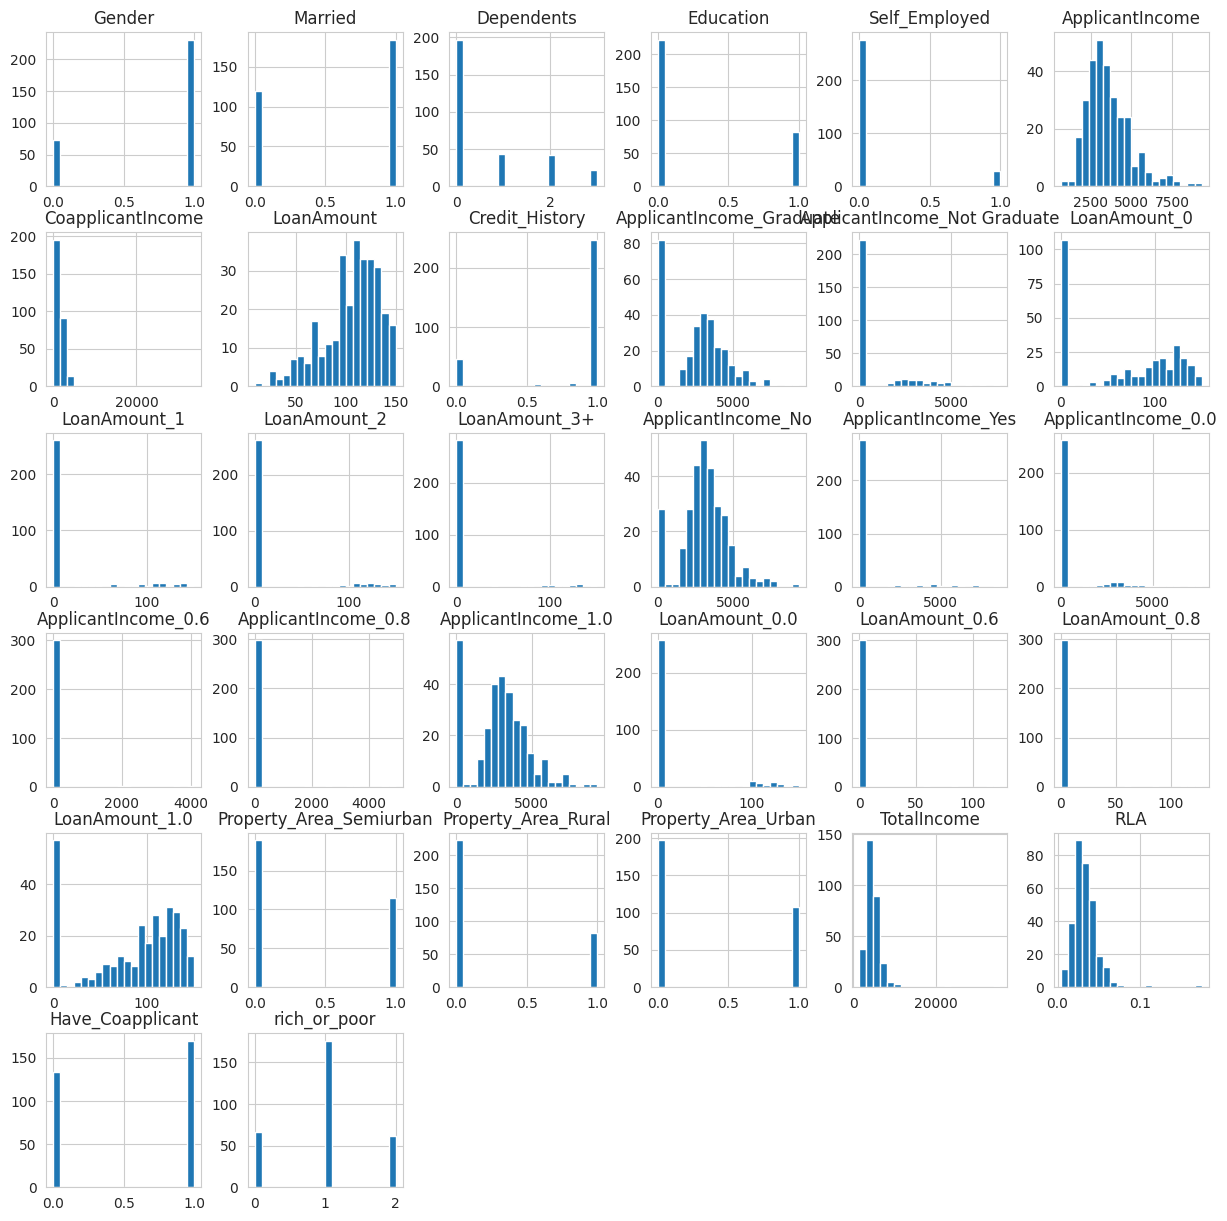

In [ ]:
fig,ax =plt.subplots(figsize=(15,15))

X_train.hist(ax=ax,bins=20)

In [ ]:
#right skwed -> log
a = ["ApplicantIncome","CoapplicantIncome","ApplicantIncome_Graduate","ApplicantIncome_No","ApplicantIncome_1.0","TotalIncome","RLA"]
#for i in a:
   #X_train[f'log_{i}'] = np.log(X_train[i])

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

In [ ]:
bct = YeoJohnsonTransformer(variables = a)
bct.fit(X_train)
X_train =  bct.transform(X_train)

In [ ]:
X_test =  bct.transform(X_test)

<ipython-input-66-6fd4405c5add>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=ax,bins=20)


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'ApplicantIncome_Graduate'}>,
        <Axes: title={'center': 'ApplicantIncome_Not Graduate'}>,
        <Axes: title={'center': 'LoanAmount_0'}>],
       [<Axes: title={'center': 'LoanAmount_1'}>,
        <Axes: title={'center': 'LoanAmount_2'}>,
        <Axes: title={'center': 'LoanAmount_3+'}>,
        <Axes: title={'center': 'ApplicantIncome_No'}>,
        <Axes: title={'center': 'ApplicantIncome_Yes'}>,
        <Axes: title={'center': 'ApplicantIncome_0.0'}>],
       [<Axes: title={'center': 'ApplicantIncome_0.6'}>

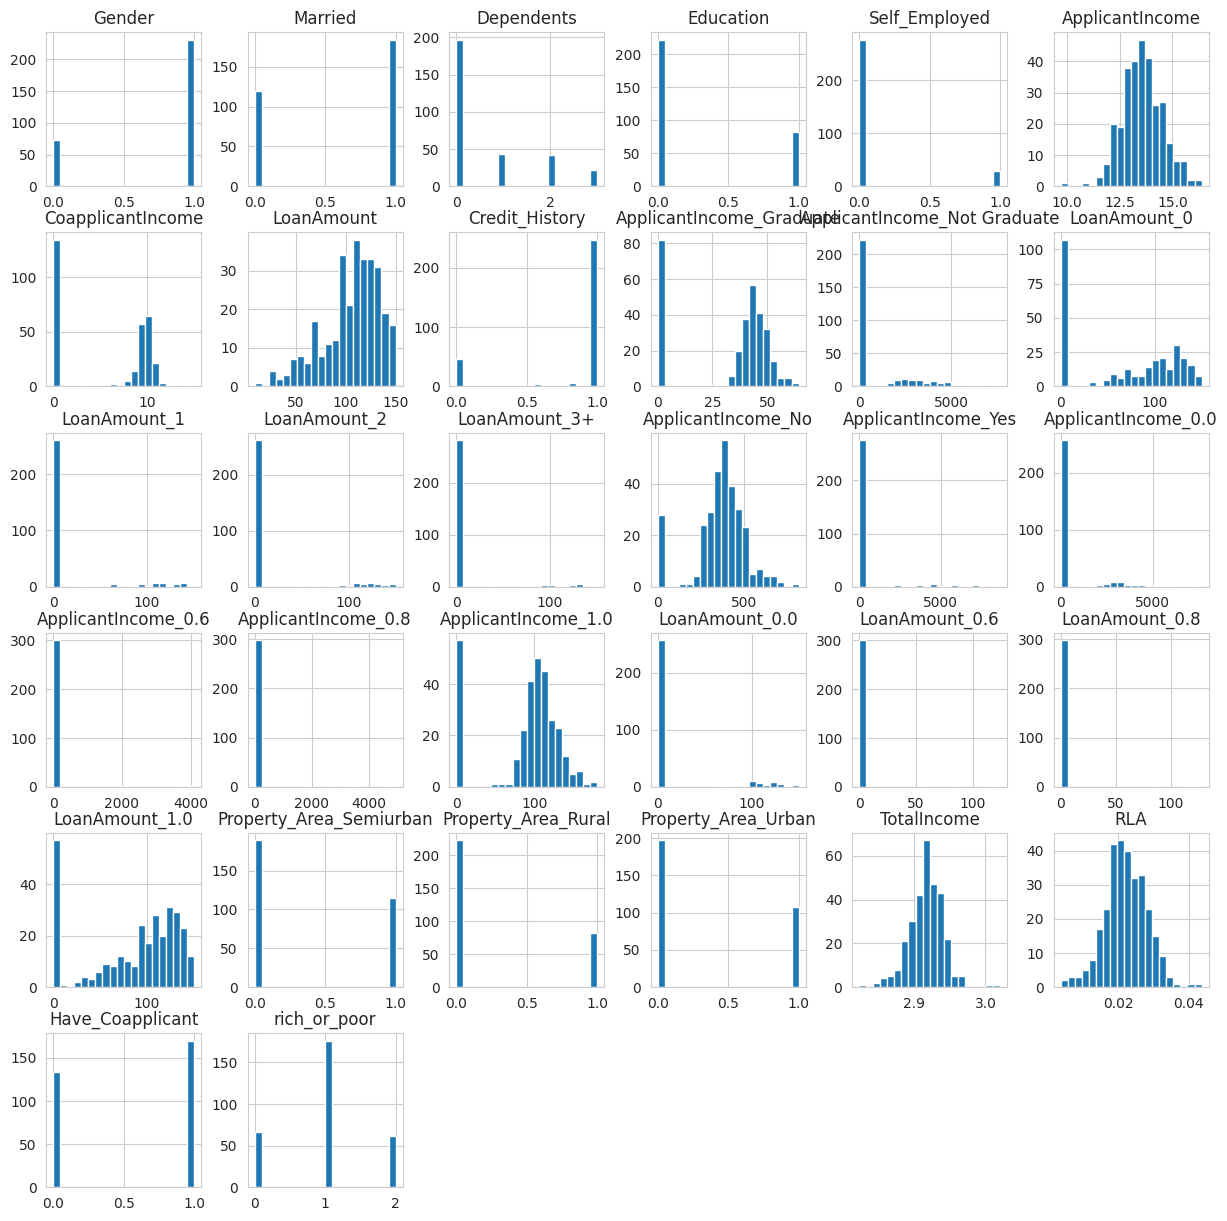

In [ ]:
fig,ax =plt.subplots(figsize=(15,15))

X_train.hist(ax=ax,bins=20)

##feature selection(1)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
def score_dataset(X, y, model=XGBRegressor()):
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_error",
    )
    score = score.mean()
    return score

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
mi_scores = make_mi_scores(X_train, y_train)

In [ ]:
mi_scores

ApplicantIncome_0.0             0.277675
LoanAmount_0.0                  0.176227
ApplicantIncome_1.0             0.166970
LoanAmount_1.0                  0.163461
Credit_History                  0.158282
LoanAmount_1                    0.121884
ApplicantIncome_Graduate        0.055352
ApplicantIncome_0.8             0.055042
CoapplicantIncome               0.047834
ApplicantIncome_No              0.044818
ApplicantIncome                 0.038759
Gender                          0.030044
ApplicantIncome_Yes             0.025104
Property_Area_Semiurban         0.016057
ApplicantIncome_0.6             0.013459
Property_Area_Rural             0.010464
LoanAmount_3+                   0.006921
RLA                             0.005012
Education                       0.003889
Dependents                      0.002763
Married                         0.000004
LoanAmount_2                    0.000000
Have_Coapplicant                0.000000
TotalIncome                     0.000000
Property_Area_Ur

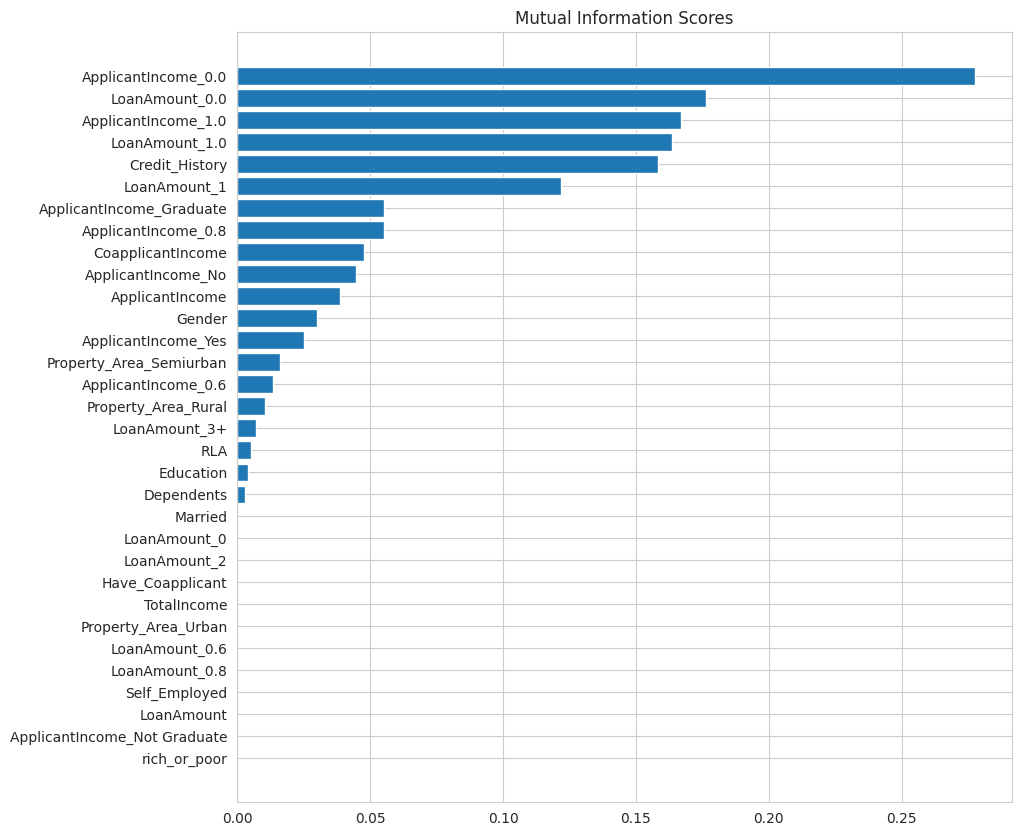

In [ ]:
plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)

In [ ]:
Sorted = list(mi_scores.index)
Sorted

['ApplicantIncome_0.0',
 'LoanAmount_0.0',
 'ApplicantIncome_1.0',
 'LoanAmount_1.0',
 'Credit_History',
 'LoanAmount_1',
 'ApplicantIncome_Graduate',
 'ApplicantIncome_0.8',
 'CoapplicantIncome',
 'ApplicantIncome_No',
 'ApplicantIncome',
 'Gender',
 'ApplicantIncome_Yes',
 'Property_Area_Semiurban',
 'ApplicantIncome_0.6',
 'Property_Area_Rural',
 'LoanAmount_3+',
 'RLA',
 'Education',
 'Dependents',
 'Married',
 'LoanAmount_2',
 'Have_Coapplicant',
 'TotalIncome',
 'Property_Area_Urban',
 'LoanAmount_0.6',
 'LoanAmount_0.8',
 'Self_Employed',
 'LoanAmount',
 'ApplicantIncome_Not Graduate',
 'LoanAmount_0',
 'rich_or_poor']

In [ ]:
X_train.drop(columns = Sorted[22:],inplace=True)
X_test.drop(columns = Sorted[22:],inplace=True)

In [ ]:
corr = X_train.join(y_train).corr()

In [ ]:
corr

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,Credit_History,ApplicantIncome_Graduate,LoanAmount_1,LoanAmount_2,...,ApplicantIncome_0.0,ApplicantIncome_0.6,ApplicantIncome_0.8,ApplicantIncome_1.0,LoanAmount_0.0,LoanAmount_1.0,Property_Area_Semiurban,Property_Area_Rural,RLA,Loan_Status
Gender,1.000000,0.396766,0.248658,0.133442,0.026003,0.236777,0.073315,-0.123667,0.012430,0.148769,...,-0.044993,-0.105987,-0.069068,0.105809,-0.050304,0.114341,-0.133144,0.081390,0.024384,0.031726
Married,0.396766,1.000000,0.396436,0.035913,-0.016525,0.349282,0.039881,-0.037073,0.104659,0.235257,...,-0.059382,0.020956,0.028278,0.023989,-0.043928,0.115554,0.033232,-0.024740,0.144998,0.063261
Dependents,0.248658,0.396436,1.000000,0.114074,0.149247,-0.037449,-0.042968,-0.074781,0.145418,0.550935,...,0.017764,0.001787,0.036517,0.023443,0.033399,0.025889,-0.007056,-0.015722,-0.049667,-0.060758
Education,0.133442,0.035913,0.114074,1.000000,-0.037381,0.015432,-0.032132,-0.968859,-0.018264,0.056683,...,0.014611,0.019768,0.083968,-0.060637,-0.001583,-0.030741,-0.061434,0.098220,0.038610,-0.069671
ApplicantIncome,0.026003,-0.016525,0.149247,-0.037381,1.000000,-0.437583,-0.013312,0.246077,0.028791,0.021576,...,0.165038,-0.023910,0.031435,0.351706,0.038882,0.128260,-0.002990,0.029140,-0.669923,-0.060076
CoapplicantIncome,0.236777,0.349282,-0.037449,0.015432,-0.437583,1.000000,0.030069,-0.103104,0.050962,0.057631,...,-0.090959,-0.083172,-0.046325,-0.109792,0.006104,0.154934,0.025895,0.004229,0.573079,0.137461
Credit_History,0.073315,0.039881,-0.042968,-0.032132,-0.013312,0.030069,1.000000,0.027026,-0.009079,-0.027778,...,-0.914209,-0.071974,-0.013637,0.867518,-0.966624,0.792160,0.057022,-0.052636,-0.062119,0.625731
ApplicantIncome_Graduate,-0.123667,-0.037073,-0.074781,-0.968859,0.246077,-0.103104,0.027026,1.000000,0.022233,-0.043284,...,0.020424,-0.032802,-0.084694,0.136093,0.012524,0.058037,0.057780,-0.093894,-0.177342,0.058448
LoanAmount_1,0.012430,0.104659,0.145418,-0.018264,0.028791,0.050962,-0.009079,0.022233,1.000000,-0.151461,...,-0.008752,0.130047,-0.052667,0.003540,0.001139,0.044928,0.023193,-0.052173,0.057904,-0.024993
LoanAmount_2,0.148769,0.235257,0.550935,0.056683,0.021576,0.057631,-0.027778,-0.043284,-0.151461,1.000000,...,0.011366,-0.043155,-0.034572,0.002514,0.051085,0.094819,0.018971,-0.012463,0.120058,-0.020793


<Axes: >

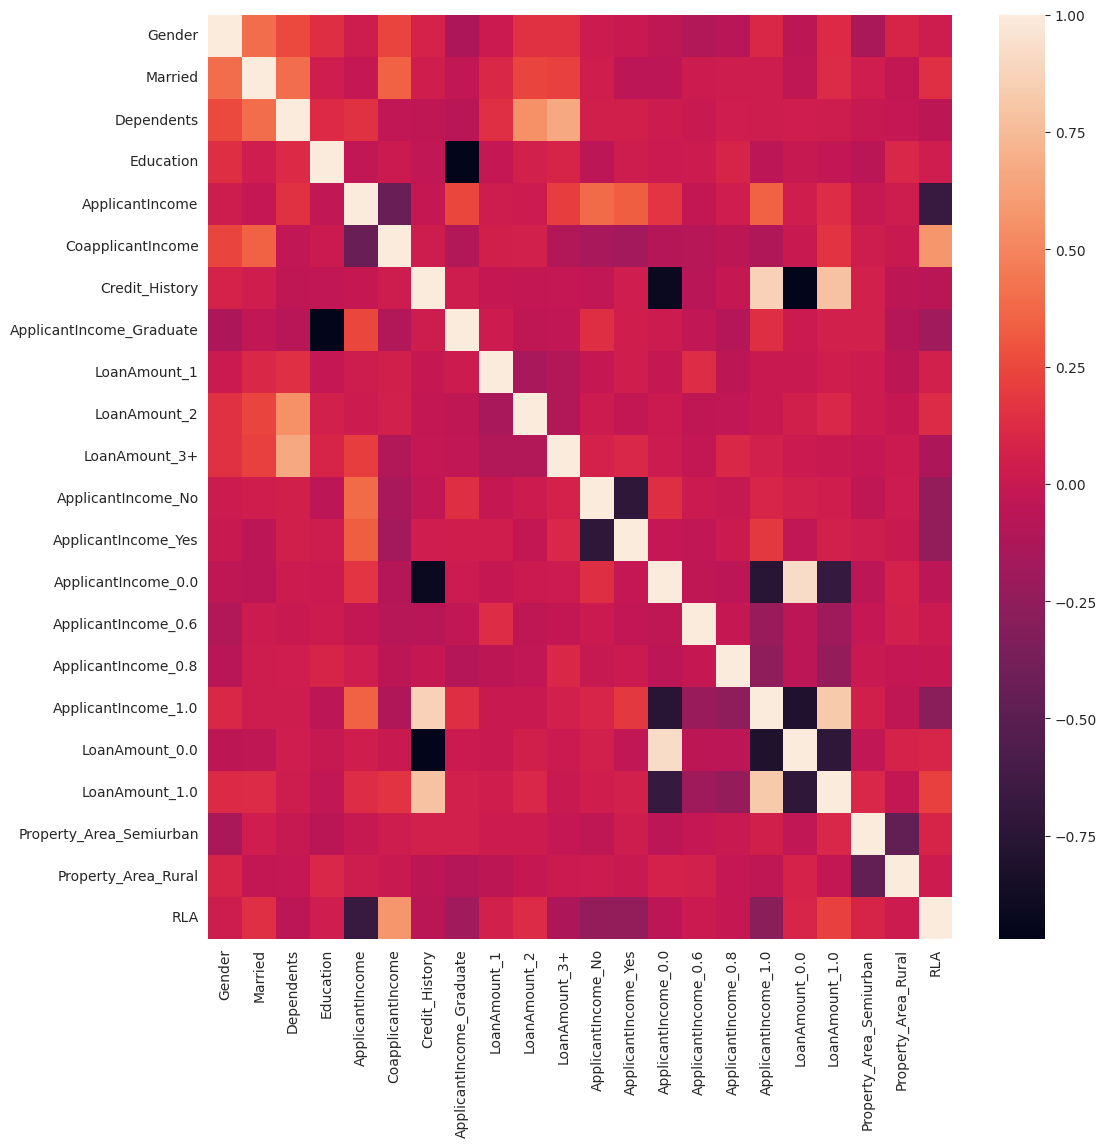

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(X_train.corr(),ax=ax)

In [ ]:
a = ['Education','Credit_History','LoanAmount_1.0','LoanAmount_0.0','ApplicantIncome_1.0','ApplicantIncome_Yes','Property_Area_Rural']

In [ ]:
#X_train=X_train.copy()
#Xte=X_test.copy()

In [ ]:
X_train.drop(columns=a,inplace=True)
X_test.drop(columns=a,inplace=True)

<Axes: >

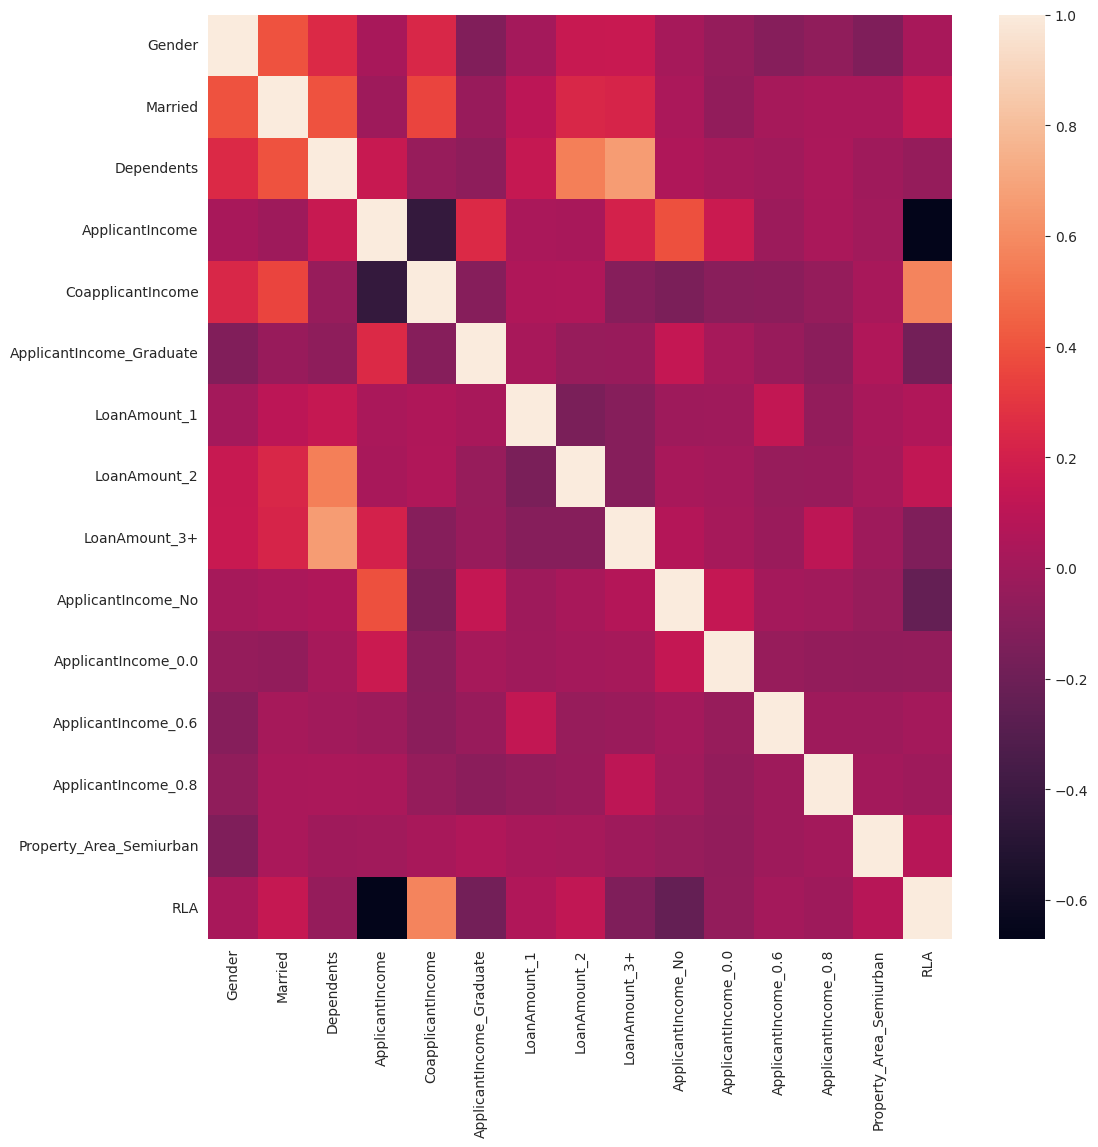

In [ ]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(X_train.corr(),ax=ax)

In [ ]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'ApplicantIncome',
       'CoapplicantIncome', 'ApplicantIncome_Graduate', 'LoanAmount_1',
       'LoanAmount_2', 'LoanAmount_3+', 'ApplicantIncome_No',
       'ApplicantIncome_0.0', 'ApplicantIncome_0.6', 'ApplicantIncome_0.8',
       'Property_Area_Semiurban', 'RLA'],
      dtype='object')

##PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
a = X_train.iloc[:,:11].copy()
X_scaled = (a - a.mean(axis=0)) / a.std(axis=0)
X_pca = pca.fit_transform(X_scaled)

c=X_test.iloc[:,:11].copy()
X_tscaled = (c - c.mean(axis=0)) / c.std(axis=0)
X_tpca = pca.transform(X_tscaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_tpca = pd.DataFrame(X_tpca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.142872,-1.567738,0.039203,0.107335,-1.200290,0.114726,0.931499,-0.223820,0.680647,0.137271,-0.040764
1,3.289564,0.871398,-2.051873,2.710564,-0.806140,0.024273,0.278382,-0.619765,-0.111309,-0.709253,-0.144953
2,-1.190977,0.522910,-0.355501,0.058537,-0.137723,-0.641493,0.456664,0.836327,-0.890625,-0.622265,-0.048984
3,3.101463,0.491431,-0.965632,2.419990,0.314173,-1.184347,-2.231758,1.221043,0.329925,1.649816,0.263317
4,1.514925,0.463467,-0.411394,-2.195769,1.862038,-0.504749,-0.613549,-1.766870,0.608311,0.965769,-0.019140


PC6     0.117274
PC8     0.065769
PC5     0.041709
PC7     0.038100
PC3     0.028760
PC4     0.012115
PC10    0.011998
PC9     0.000030
PC1     0.000000
PC2     0.000000
PC11    0.000000
Name: MI Scores, dtype: float64


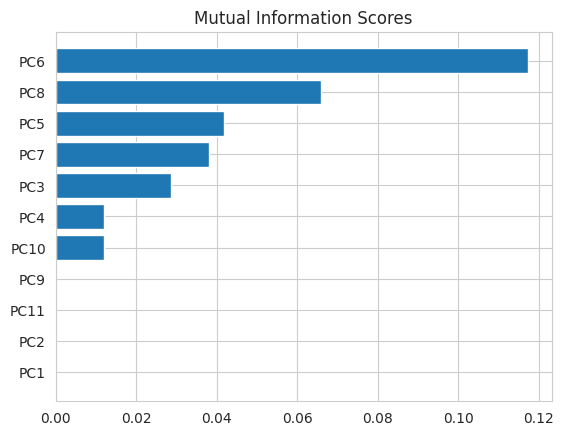

In [ ]:
pca_mi = make_mi_scores(X_pca,y_train)
print(pca_mi)
plot_mi_scores(pca_mi)

None of them are high related to label so we just pass from them

# Model

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.preprocessing import  StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
X_train.dtypes

Gender                      float64
Married                     float64
Dependents                    int64
ApplicantIncome             float64
CoapplicantIncome           float64
ApplicantIncome_Graduate    float64
LoanAmount_1                float64
LoanAmount_2                float64
LoanAmount_3+               float64
ApplicantIncome_No          float64
ApplicantIncome_0.0         float64
ApplicantIncome_0.6         float64
ApplicantIncome_0.8         float64
Property_Area_Semiurban       int64
RLA                         float64
dtype: object

In [ ]:
X_train['Married'] = X_train['Married'].astype('int')
X_train['Gender'] = X_train['Gender'].astype('int')
X_test['Gender'] = X_test['Gender'].astype('int')
X_test['Married'] = X_test['Married'].astype('int')

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
floats = []
for i in X_train.columns:
  if X_train[i].dtype == 'float64':
    floats.append(i)
scaler = ColumnTransformer(
    [
         ("StandardScaler", scale, floats)
    ]
)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def evaluate_model(true, predicted):
    AS = accuracy_score(true, predicted)
    RS = recall_score(true, predicted)
    PS = precision_score(true, predicted)
    f1 = f1_score(true, predicted)
    fpr, tpr, thresholds = roc_curve(true, predicted)
    RA = auc(fpr, tpr)
    return  AS, RS, PS, RA, f1

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVM": SVC()
}

results_df = pd.DataFrame(columns=['Model', 'Train AS', 'Train RS', 'Train PS', 'Train RA', 'Train f1', 'Test AS', 'Test RS', 'Test PS', 'Test RA', 'Test f1'])
c=0
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_pred = y_train_pred.astype('int')
    y_test_pred = y_test_pred.astype('int')
    # Evaluate Train and Test dataset
    model_train_AS, model_train_RS, model_train_PS, model_train_RA, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_AS, model_test_RS, model_test_PS, model_test_RA, model_test_f1 = evaluate_model(y_test, y_test_pred)
    print(model_name)
    # Append results to DataFrame
    dic = {
        'Model': model_name,
        'Train AS': model_train_AS,
        'Train RS': model_train_RS,
        'Train PS': model_train_PS,
        'Train RA': model_train_RA,
        'Train f1': model_train_f1,
        'Test AS': model_test_AS,
        'Test RS': model_test_RS,
        'Test PS': model_test_PS,
        'Test RA': model_test_RA,
        'Test f1': model_test_f1
    }
    results_df = pd.concat([results_df , pd.DataFrame(dic, index=[c])])
    c+=1

# Display the results DataFrame
results_df.head(10)

Logistic Regression
Lasso
Ridge
K-Neighbors Classifier
Decision Tree


<ipython-input-94-51feb68cf8ec>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df , pd.DataFrame(dic, index=[c])])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

Random Forest Classifier
XGBClassifier
CatBoosting Classifier
AdaBoost Classifier
SVM


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Train AS,Train RS,Train PS,Train RA,Train f1,Test AS,Test RS,Test PS,Test RA,Test f1
0,Logistic Regression,0.848684,0.990741,0.829457,0.745370,0.902954,0.818182,0.981818,0.805970,0.695455,0.885246
1,Lasso,0.289474,0.000000,0.000000,0.500000,0.000000,0.285714,0.000000,0.000000,0.500000,0.000000
2,Ridge,0.289474,0.000000,0.000000,0.500000,0.000000,0.285714,0.000000,0.000000,0.500000,0.000000
3,K-Neighbors Classifier,0.828947,0.976852,0.817829,0.721380,0.890295,0.805195,0.963636,0.803030,0.686364,0.876033
4,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,0.714286,0.818182,0.789474,0.636364,0.803571
5,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.779221,0.909091,0.806452,0.681818,0.854701
6,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.805195,0.890909,0.844828,0.740909,0.867257
7,CatBoosting Classifier,0.937500,0.995370,0.922747,0.895412,0.957684,0.792208,0.945455,0.800000,0.677273,0.866667
8,AdaBoost Classifier,0.914474,0.986111,0.902542,0.862374,0.942478,0.766234,0.890909,0.803279,0.672727,0.844828
9,SVM,0.855263,0.990741,0.835938,0.756734,0.906780,0.818182,0.981818,0.805970,0.695455,0.885246


In [ ]:
model = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
CM = confusion_matrix(y_test,y_pred)

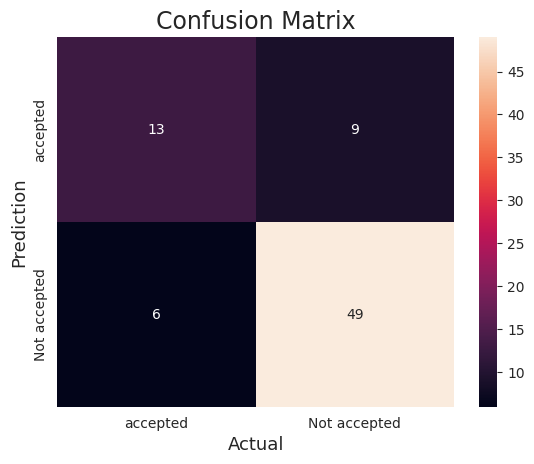

In [ ]:
sns.heatmap(CM,
           annot=True,
           fmt='g',
           xticklabels=['accepted','Not accepted'],
           yticklabels=['accepted','Not accepted'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

<Axes: >

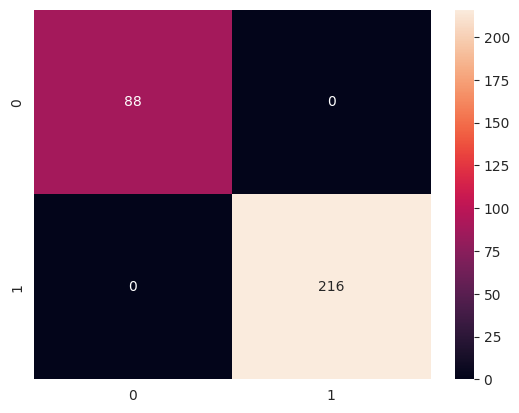

In [ ]:
sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),
           annot=True,
           fmt='g')

# MODEL EVALUATION

In [ ]:
y_diff = y_test - y_pred

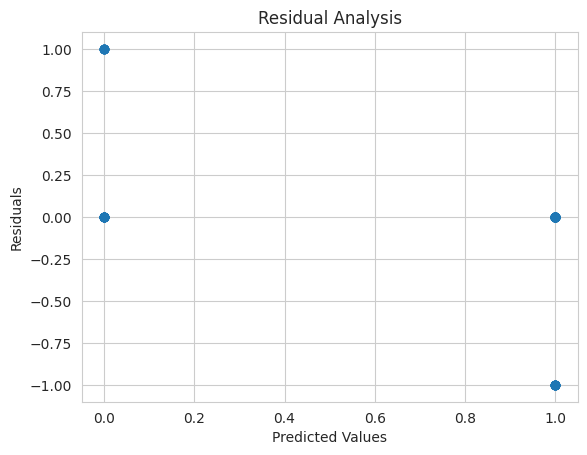

In [ ]:
plt.scatter(y_pred, y_diff)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

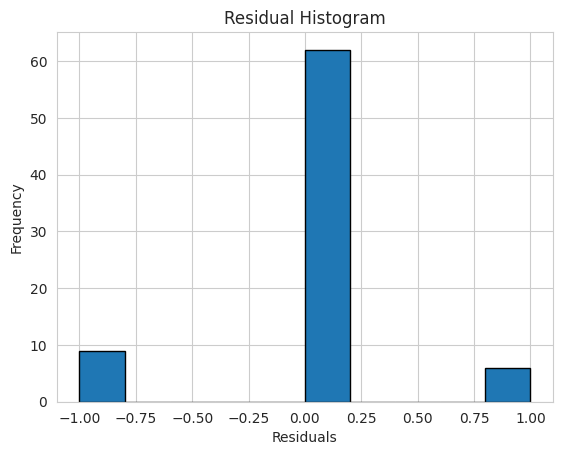

In [ ]:
plt.hist(y_diff,  edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.3],  # Learning rate
    'n_estimators': [100, 1000],   # Number of trees (boosting rounds)
    'max_depth': [3, 5, 7],                # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],         # Minimum loss reduction required to make a further partition
    'subsample': [0.6, 0.7, 0.8],        # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7], # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.001, 0.005],# L1 regularization term on weights
    'reg_lambda': [0, 0.001, 0.005]# L2 regularization term on weights
     }

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [ ]:
best_params

In [ ]:
model = XGBClassifier(colsample_bytree= 0.6, gamma = 1, max_depth = 3, min_child_weight = 5, subsample = 1.0).fit(X_train, y_train)

In [ ]:
accuracy_score(y_train, model.predict(X_train))

In [ ]:
accuracy_score(y_test, model.predict(X_test))